# Linear Regression


Shilpi ghosal

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from mlxtend.plotting import plot_linear_regression

In [2]:
#importing data
url= 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df= pd.read_csv(url)

In [3]:
df.head()#printing first 5 entries

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#checking for null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

Text(0, 0.5, 'Scores')

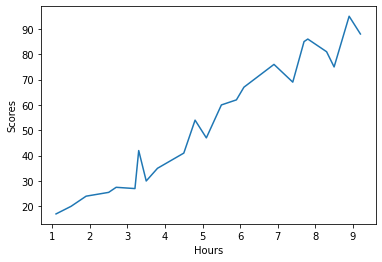

In [5]:
#visualizing the trend between Hours and score
df.groupby('Hours').agg('mean')['Scores'].plot(kind='line')
plt.ylabel('Scores')

In [6]:
#Preparing data for Linear Regression
X=df.iloc[:, :-1].values
Y=df.iloc[:, 1].values

#training model
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
l=LinearRegression()
l.fit(X_train,y_train)
a=l.predict(X_train)
b=l.predict(X_test)
print('Training Done')


Training Done


In [7]:
#Calculating R2 score of train and test dataset for the accuracy.
print("Train r2 score", r2_score(y_train,a))
print("Train r2 score", r2_score(y_test,b))

Train r2 score 0.9515510725211552
Train r2 score 0.9454906892105356


In [14]:
#applying y=mx+c
c = l.coef_*X+l.intercept_


4.183859899002975


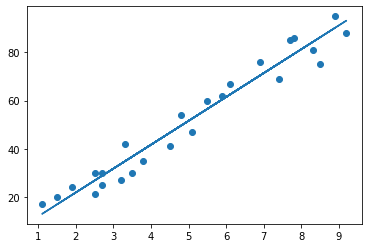

In [9]:
#Plotting the Regression line
plt.scatter(X, Y)
plt.plot(X, c);
plt.show()

In [10]:
#Actual vs predicted data
data = pd.DataFrame({'Actual': y_test, 'Predicted': b})
data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [11]:
#Testing with the Given dat
hours = 9.25
own_pred = l.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


In [15]:
#Calculating mean absolute value to test the accuracy.
d=mean_absolute_error(y_test,b)
print(d)

4.183859899002975
